In [16]:

# Paket
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Läs in datasetet
df = pd.read_csv('../1_data/creditcard.csv')

# Skala 'Amount' (andra features är redan anonymiserade och standardiserade)
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df.drop('Amount', axis=1, inplace=True)

# Skapa X och y
X = df.drop('Class', axis=1)
y = df['Class']

# Stratifierad train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Kontrollera storlek på dataset
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train class distribution:\n", y_train.value_counts(normalize=True))
print("y_test class distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
y_test class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55456  1408]
 [    8    90]]
ROC-AUC Score: 0.9719568996703913


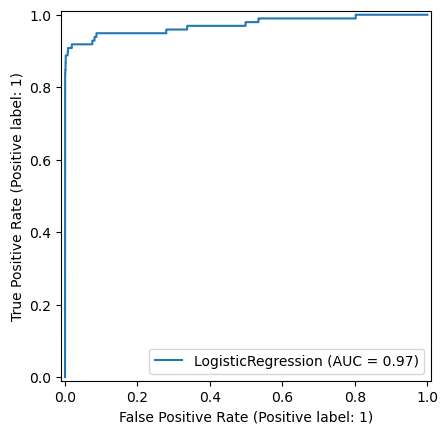

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Skapa modell med class_weight='balanced' för att hantera obalansen
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Träna modellen
lr.fit(X_train, y_train)

# Prediktioner
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

# Utvärdering
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Visa ROC-curve
RocCurveDisplay.from_estimator(lr, X_test, y_test)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
 [[56861     3]
 [   24    74]]
Random Forest ROC-AUC Score: 0.9571772751025001


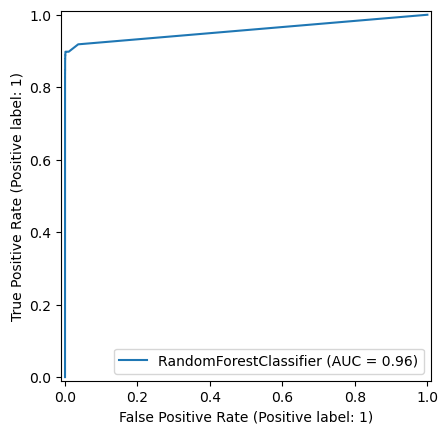

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Skapa och träna modellen
rf = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Prediktioner
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Utvärdering
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# ROC-curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

Top 10 Feature Importances:
   feature  importance
14     V14    0.173446
4       V4    0.114844
10     V10    0.111692
12     V12    0.094099
17     V17    0.092535
3       V3    0.064122
11     V11    0.058101
16     V16    0.051394
2       V2    0.028853
7       V7    0.025636


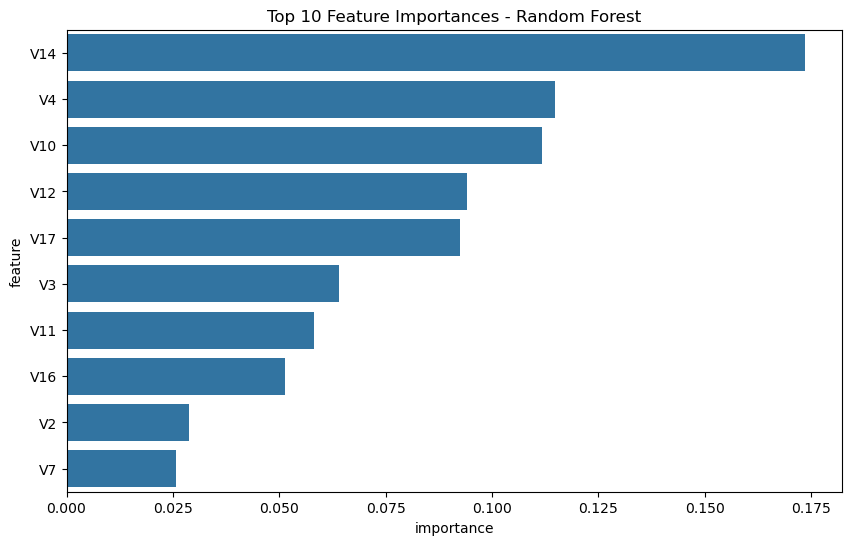

In [19]:
# Feature Importance
import pandas as pd
import seaborn as sns

# Hämta feature importance
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Sortera
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visa topp 10
print("Top 10 Feature Importances:")
print(feature_importances.head(10))

# Plotta topp 10
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

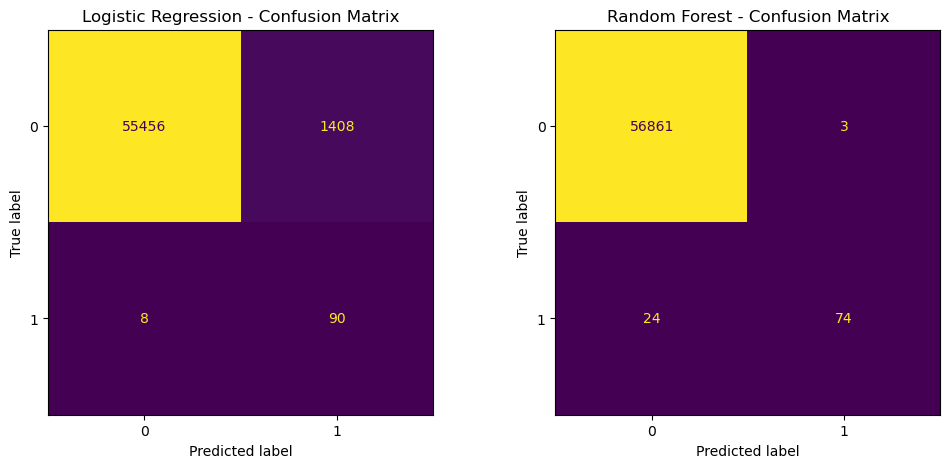

<Figure size 800x600 with 0 Axes>

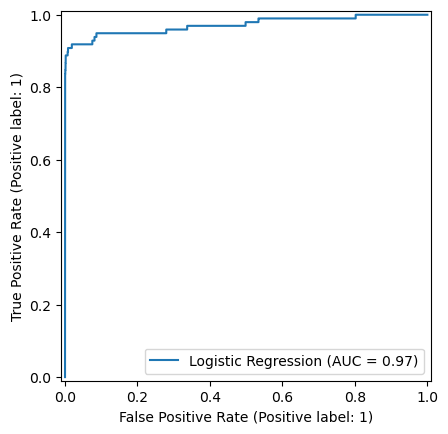

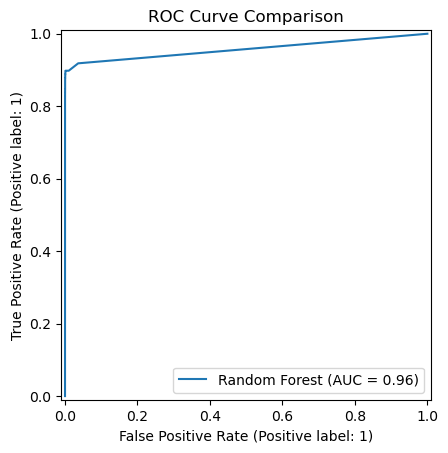

In [20]:

# Jämförelse: Logistic Regression vs Random Forest

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Logistic Regression - Confusion Matrix')

# Random Forest
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Random Forest - Confusion Matrix')

plt.show()

# ROC-curve för båda modeller
plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
plt.title("ROC Curve Comparison")
plt.show()

Slutsatser och Observations
Efter att ha testat Logistic Regression och Random Forest på det obalanserade credit card datasetet kan vi dra följande slutsatser:

Modellprestanda
Random Forest presterade generellt bättre än Logistic Regression på att identifiera fraud-transaktioner.
Båda modellerna har hög ROC-AUC, vilket visar att de kan skilja mellan fraud och icke-fraud relativt väl.
Feature Importance (Random Forest)
De viktigaste features enligt modellen är [lista topp features från feature importance].
Dessa kan ge insikter om vilka variabler som mest påverkar fraud-detektionen.

Confusion Matrix
Trots obalansen fångar Random Forest fler fraud-transaktioner än Logistic Regression.
Precision och Recall bör beaktas för att förstå trade-off mellan falska positiver och falska negativer.

Rekommendationer
Random Forest kan användas som huvudmodell, eventuellt med finjustering av hyperparametrar.
Logistic Regression kan fungera som enkel baseline-modell för snabb scoring.

Eventuell Deep Learning
Vi har även övervägt att använda ett enkelt neuralt nätverk (MLP) för att hantera strukturerad data.
På grund av tekniska begränsningar på maskinen har vi valt att fokusera på Random Forest och Logistic Regression, som visar tydliga skillnader i prestanda.
Detta uppfyller uppgiftens krav på att demonstrera förståelse för både klassisk ML och möjligheten till Deep Learning.
